In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import logging
import sys

# Import the necessary libraries for plotting
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

# Import the MacroStat get_model function
from macrostat.models import get_model
from macrostat.causality import DocstringCausalityAnalyzer
 
# We show the logging output in the notebook
importlib.reload(logging)
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [2]:
IOPCClass = get_model("IOPC")
model = IOPCClass()
model.simulate()
output = model.variables.to_pandas()

In [3]:
model.variables.check_health(tolerance=1e-5)

True

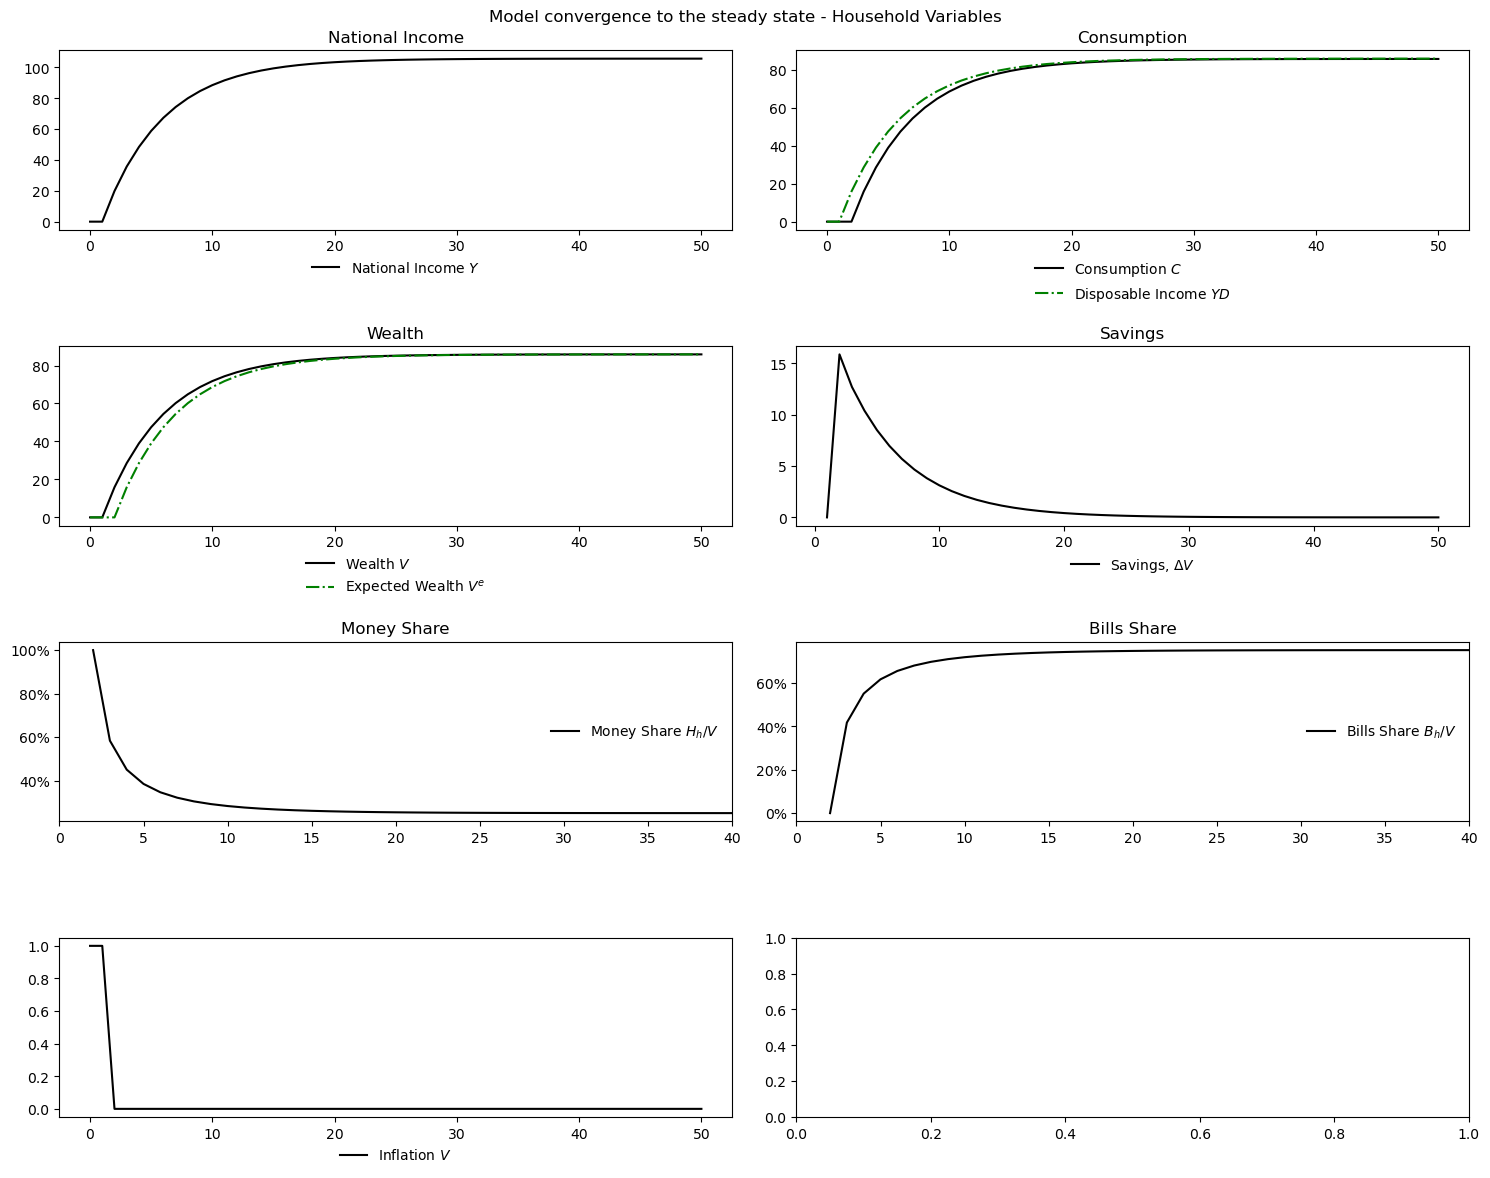

In [5]:
dfo = output.loc[:50]

fig, axs = plt.subplots(4, 2, figsize=(15, 12))  

# National Income and Consumption
axs[0,0].plot(dfo.index, dfo['NationalIncome'], color='k', label=r'National Income $Y$')
axs[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,0].set_title('National Income')
axs[0,1].plot(dfo.index, dfo['RealConsumptionHousehold'], color='k', label=r'Consumption $C$')
axs[0,1].plot(dfo.index, dfo['DisposableIncome'], color='g', linestyle='-.', label=r'Disposable Income $YD$')
axs[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,1].set_title('Consumption')

# Wealth and Savings
axs[1,0].plot(dfo.index, dfo['Wealth'], color='k', label=r'Wealth $V$')
axs[1,0].plot(dfo.index, dfo['ExpectedWealth'], color='g', linestyle='-.', label=r'Expected Wealth $V^e$')
axs[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,0].set_title('Wealth')
axs[1,1].plot(dfo.index, dfo['Wealth'].diff(), color='k', label=r'Savings, $\Delta V$')
axs[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,1].set_title('Savings')

# Money Share and Bills Share
axs[2,0].plot(dfo.index, dfo['HouseholdMoneyStock'] / dfo['Wealth'], color='k', linestyle='-', label='Money Share $H_h/V$')
axs[2,0].legend(loc='center right', frameon=False)
axs[2,0].set_xlim(0,40)
axs[2,0].set_title('Money Share')
axs[2,0].yaxis.set_major_formatter(PercentFormatter(1))

# Right panel - Bills share
axs[2,1].plot(dfo.index, dfo['HouseholdBillStock'] / dfo['Wealth'], color='k', linestyle='-', label='Bills Share $B_h/V$')
axs[2,1].legend(loc='center right', frameon=False)
axs[2,1].set_xlim(0,40)
axs[2,1].set_title('Bills Share')
axs[2,1].yaxis.set_major_formatter(PercentFormatter(1))

#Inflation rate (growth of CPI)
axs[3,0].plot(dfo.index, dfo['ConsumerPriceInflation'], color='k', label=r'Inflation $V$')
axs[3,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)


fig.suptitle('Model convergence to the steady state - Household Variables')
plt.tight_layout()
plt.show()


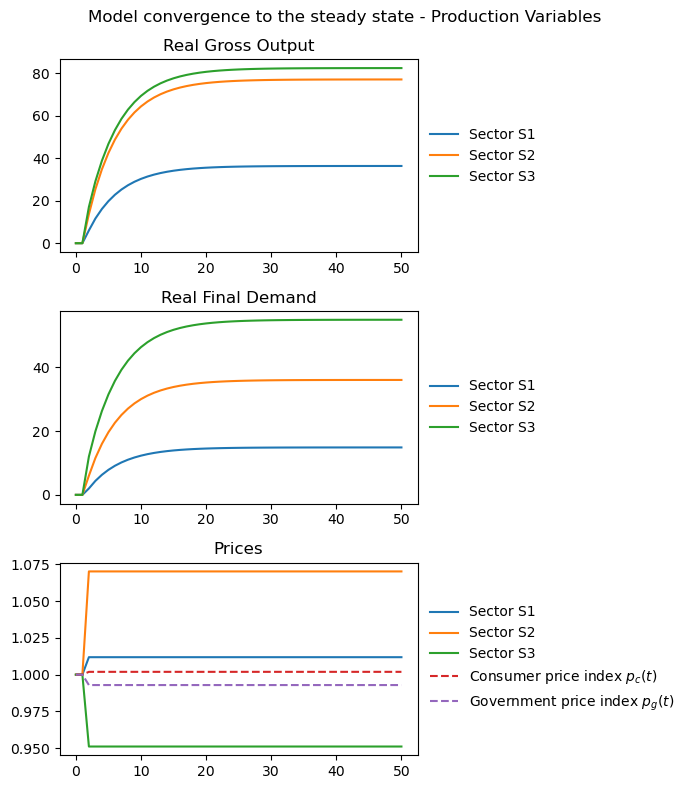

In [6]:
dfo = output.loc[:50]

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(7, 8))

# National Income and Consumption
for s in dfo["RealGrossOutput"].columns:
    axs[0].plot(dfo.index, dfo['RealGrossOutput'][s], label=f"Sector {s}")
axs[0].set_title('Real Gross Output')

for s in dfo["RealFinalDemand"].columns:
    axs[1].plot(dfo.index, dfo['RealFinalDemand'][s], label=f"Sector {s}")
axs[1].set_title('Real Final Demand')

for s in dfo["Prices"].columns:
    axs[2].plot(dfo.index, dfo['Prices'][s], label=f"Sector {s}")
axs[2].plot(dfo.index, dfo["ConsumerPriceIndex"], linestyle="--", label=f"Consumer price index $p_c(t)$")
axs[2].plot(dfo.index, dfo["GovernmentPriceIndex"], linestyle="--", label=f"Government price index $p_g(t)$")
axs[2].set_title('Prices')

for ax in axs:
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)


fig.suptitle('Model convergence to the steady state - Production Variables')
plt.tight_layout()
plt.show()

In [7]:
model.parameters["scenario_trigger"] = 60
model.scenarios.add_scenario(
    name="SupplyBottleneck",
    timeseries={"S1_S2_Requirement_add": 0.12+0.012}
) #for retrieving this variable in the model with the _add suffix Anaconda Assistant "Fix code" was employed

model.simulate(scenario="SupplyBottleneck")

output_scenario = model.variables.to_pandas()

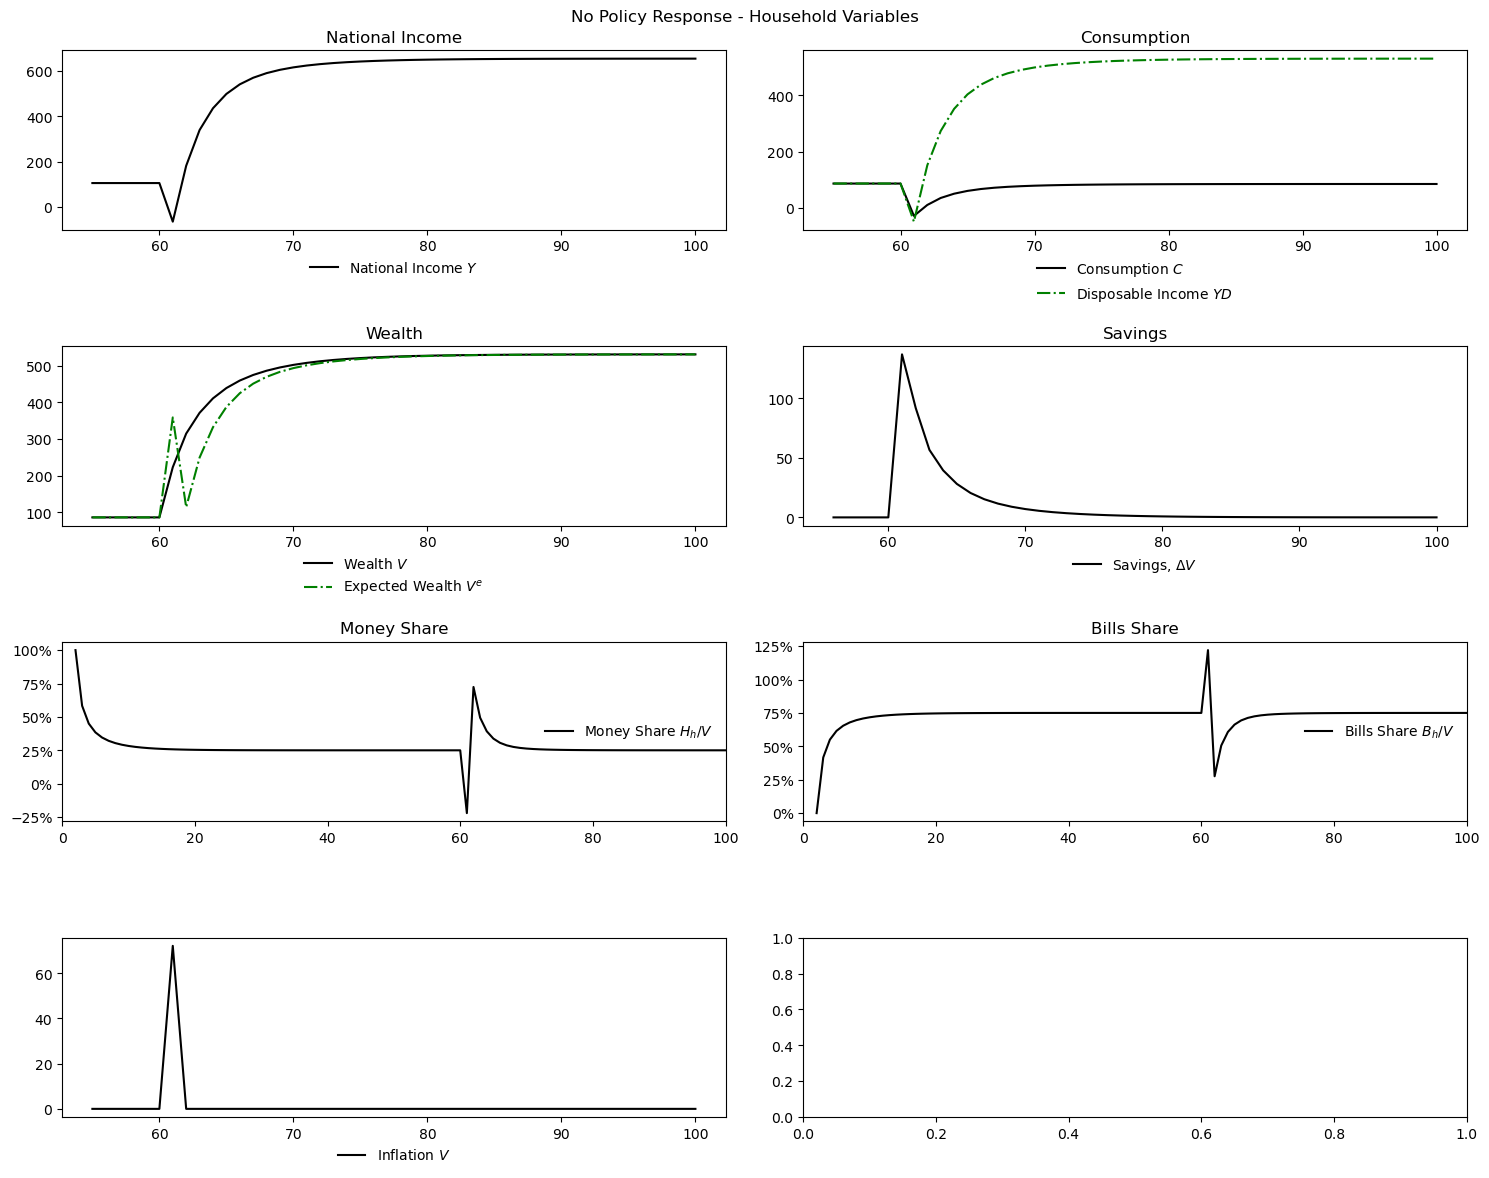

In [8]:
dfo = output_scenario.loc[55:]

fig, axs = plt.subplots(4, 2, figsize=(15, 12))  

# National Income
axs[0,0].plot(dfo.index, dfo['NationalIncome'], color='k', label=r'National Income $Y$')
axs[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,0].set_title('National Income')
axs[0,1].plot(dfo.index, dfo['RealConsumptionHousehold'], color='k', label=r'Consumption $C$')
axs[0,1].plot(dfo.index, dfo['DisposableIncome'], color='g', linestyle='-.', label=r'Disposable Income $YD$')
axs[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,1].set_title('Consumption')

# Wealth and Savings
axs[1,0].plot(dfo.index, dfo['Wealth'], color='k', label=r'Wealth $V$')
axs[1,0].plot(dfo.index, dfo['ExpectedWealth'], color='g', linestyle='-.', label=r'Expected Wealth $V^e$')
axs[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,0].set_title('Wealth')
axs[1,1].plot(dfo.index, dfo['Wealth'].diff(), color='k', label=r'Savings, $\Delta V$')
axs[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,1].set_title('Savings')

# Money Share and Bills Share
axs[2,0].plot(output_scenario.index, output_scenario['HouseholdMoneyStock'] / output_scenario['Wealth'], color='k', linestyle='-', label='Money Share $H_h/V$')
axs[2,0].legend(loc='center right', frameon=False)
axs[2,0].set_xlim(0,100)
axs[2,0].set_title('Money Share')
axs[2,0].yaxis.set_major_formatter(PercentFormatter(1))

# Right panel - Bills share
axs[2,1].plot(output_scenario.index, output_scenario['HouseholdBillStock'] / output_scenario['Wealth'], color='k', linestyle='-', label='Bills Share $B_h/V$')
axs[2,1].legend(loc='center right', frameon=False)
axs[2,1].set_xlim(0,100)
axs[2,1].set_title('Bills Share')
axs[2,1].yaxis.set_major_formatter(PercentFormatter(1))

#Inflation rate (growth of CPI)
axs[3,0].plot(dfo.index, dfo['ConsumerPriceInflation'], color='k', label=r'Inflation $V$')
axs[3,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)


fig.suptitle('No Policy Response - Household Variables')
plt.tight_layout()
plt.show()

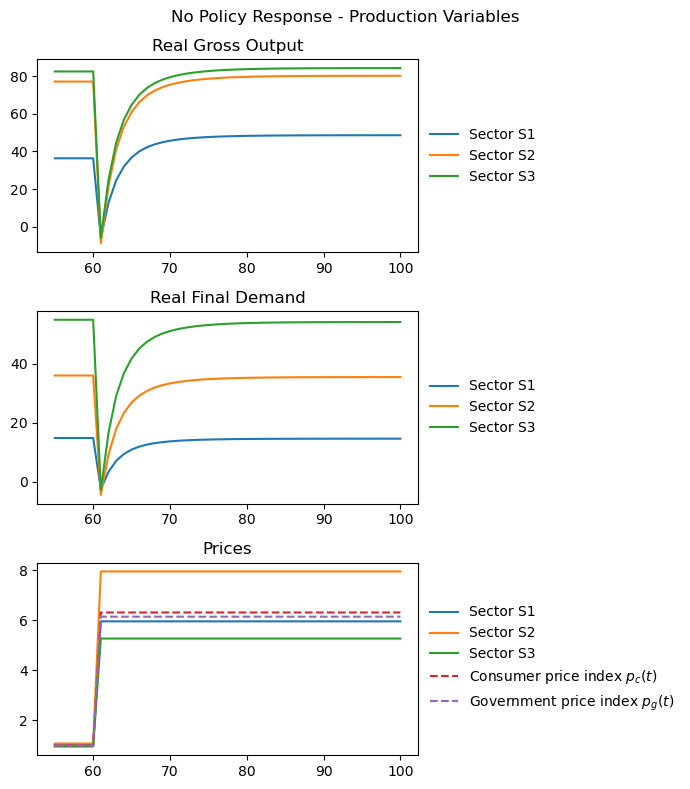

In [9]:
dfo = output_scenario.loc[55:]

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(7, 8))

# National Income and Consumption
for s in dfo["RealGrossOutput"].columns:
    axs[0].plot(dfo.index, dfo['RealGrossOutput'][s], label=f"Sector {s}")
axs[0].set_title('Real Gross Output')

for s in dfo["RealFinalDemand"].columns:
    axs[1].plot(dfo.index, dfo['RealFinalDemand'][s], label=f"Sector {s}")
axs[1].set_title('Real Final Demand')

for s in dfo["Prices"].columns:
    axs[2].plot(dfo.index, dfo['Prices'][s], label=f"Sector {s}")
axs[2].plot(dfo.index, dfo["ConsumerPriceIndex"], linestyle="--", label=f"Consumer price index $p_c(t)$")
axs[2].plot(dfo.index, dfo["GovernmentPriceIndex"], linestyle="--", label=f"Government price index $p_g(t)$")
axs[2].set_title('Prices')

for ax in axs:
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)


fig.suptitle('No Policy Response - Production Variables')
plt.tight_layout()
plt.show()


In [10]:
### TWO POLICY SCENARIOS - households

In [11]:
model.parameters["scenario_trigger"] = 60
model.scenarios.add_scenario(
    name="PolicyResponse#1",
    timeseries={
        "S1_S2_Requirement_add": 0.12+0.012,  # This subtracts 10% from the baseline
        "Markup_add": -0.1  # decrease in markup rate by 10%!!

    }
)

# Run the simulation with this scenario
model.simulate(scenario="PolicyResponse#1")

# Get the output
output2_scenario = model.variables.to_pandas()

In [12]:
model.parameters["scenario_trigger"] = 60
model.scenarios.add_scenario(
    name="PolicyResponse#2",
    timeseries={
        "InterestRate": 0.025 + 0.01,      # increased interest rate by 1%!!
        "S1_S2_Requirement_add": 0.12+0.012  # This subtracts 10% from the baseline
    }
)

# Run the simulation with this scenario
model.simulate(scenario="PolicyResponse#2")

# Get the output
output3_scenario = model.variables.to_pandas()

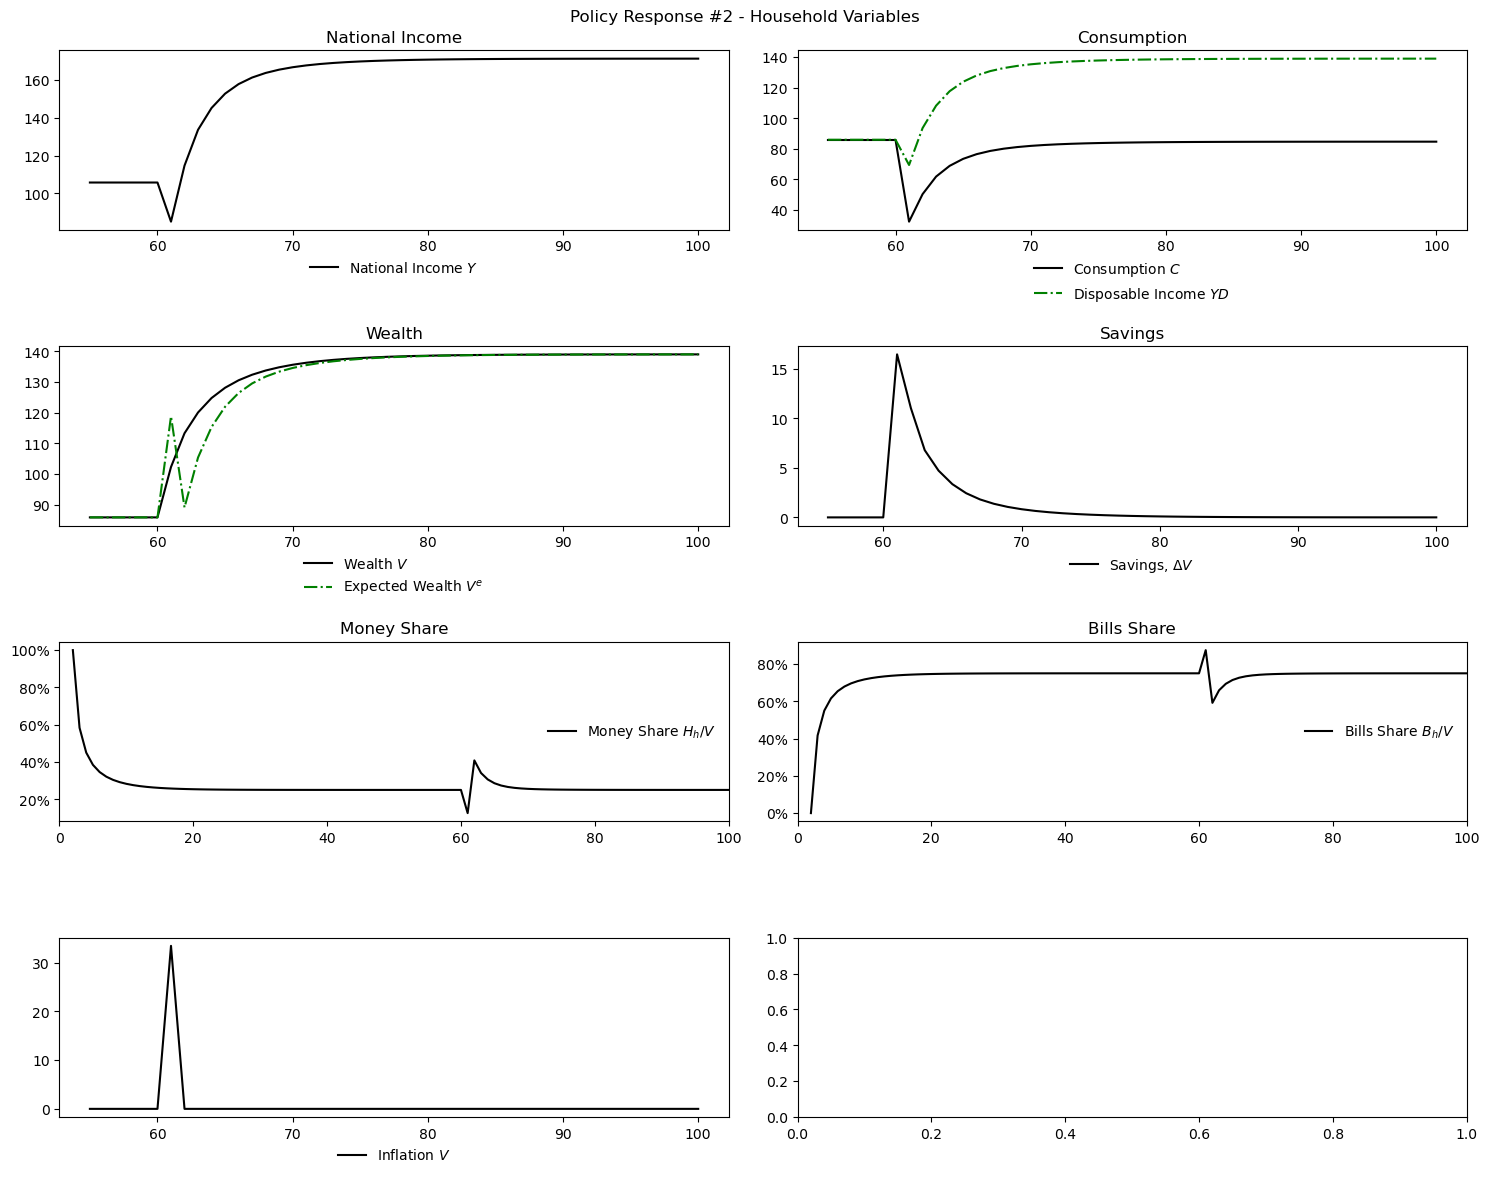

In [13]:
dfo = output2_scenario.loc[55:]

fig, axs = plt.subplots(4, 2, figsize=(15, 12)) # Create a figure with 4 rows instead of 3 (Anaconda assistant employed here)


# National Income and Consumption
axs[0,0].plot(dfo.index, dfo['NationalIncome'], color='k', label=r'National Income $Y$')
axs[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,0].set_title('National Income')
axs[0,1].plot(dfo.index, dfo['RealConsumptionHousehold'], color='k', label=r'Consumption $C$')
axs[0,1].plot(dfo.index, dfo['DisposableIncome'], color='g', linestyle='-.', label=r'Disposable Income $YD$')
axs[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,1].set_title('Consumption')

# Wealth and Savings
axs[1,0].plot(dfo.index, dfo['Wealth'], color='k', label=r'Wealth $V$')
axs[1,0].plot(dfo.index, dfo['ExpectedWealth'], color='g', linestyle='-.', label=r'Expected Wealth $V^e$')
axs[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,0].set_title('Wealth')
axs[1,1].plot(dfo.index, dfo['Wealth'].diff(), color='k', label=r'Savings, $\Delta V$')
axs[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,1].set_title('Savings')

# Money Share and Bills Share
axs[2,0].plot(output2_scenario.index, output2_scenario['HouseholdMoneyStock'] / output2_scenario['Wealth'], color='k', linestyle='-', label='Money Share $H_h/V$')
axs[2,0].legend(loc='center right', frameon=False)
axs[2,0].set_xlim(0,100)
axs[2,0].set_title('Money Share')
axs[2,0].yaxis.set_major_formatter(PercentFormatter(1))

# Right panel - Bills share
axs[2,1].plot(output2_scenario.index, output2_scenario['HouseholdBillStock'] / output2_scenario['Wealth'], color='k', linestyle='-', label='Bills Share $B_h/V$')
axs[2,1].legend(loc='center right', frameon=False)
axs[2,1].set_xlim(0,100)
axs[2,1].set_title('Bills Share')
axs[2,1].yaxis.set_major_formatter(PercentFormatter(1))

#Inflation rate (growth of CPI)
axs[3,0].plot(dfo.index, dfo['ConsumerPriceInflation'], color='k', label=r'Inflation $V$')
axs[3,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)

fig.suptitle('Policy Response #2 - Household Variables')
plt.tight_layout()
plt.show()

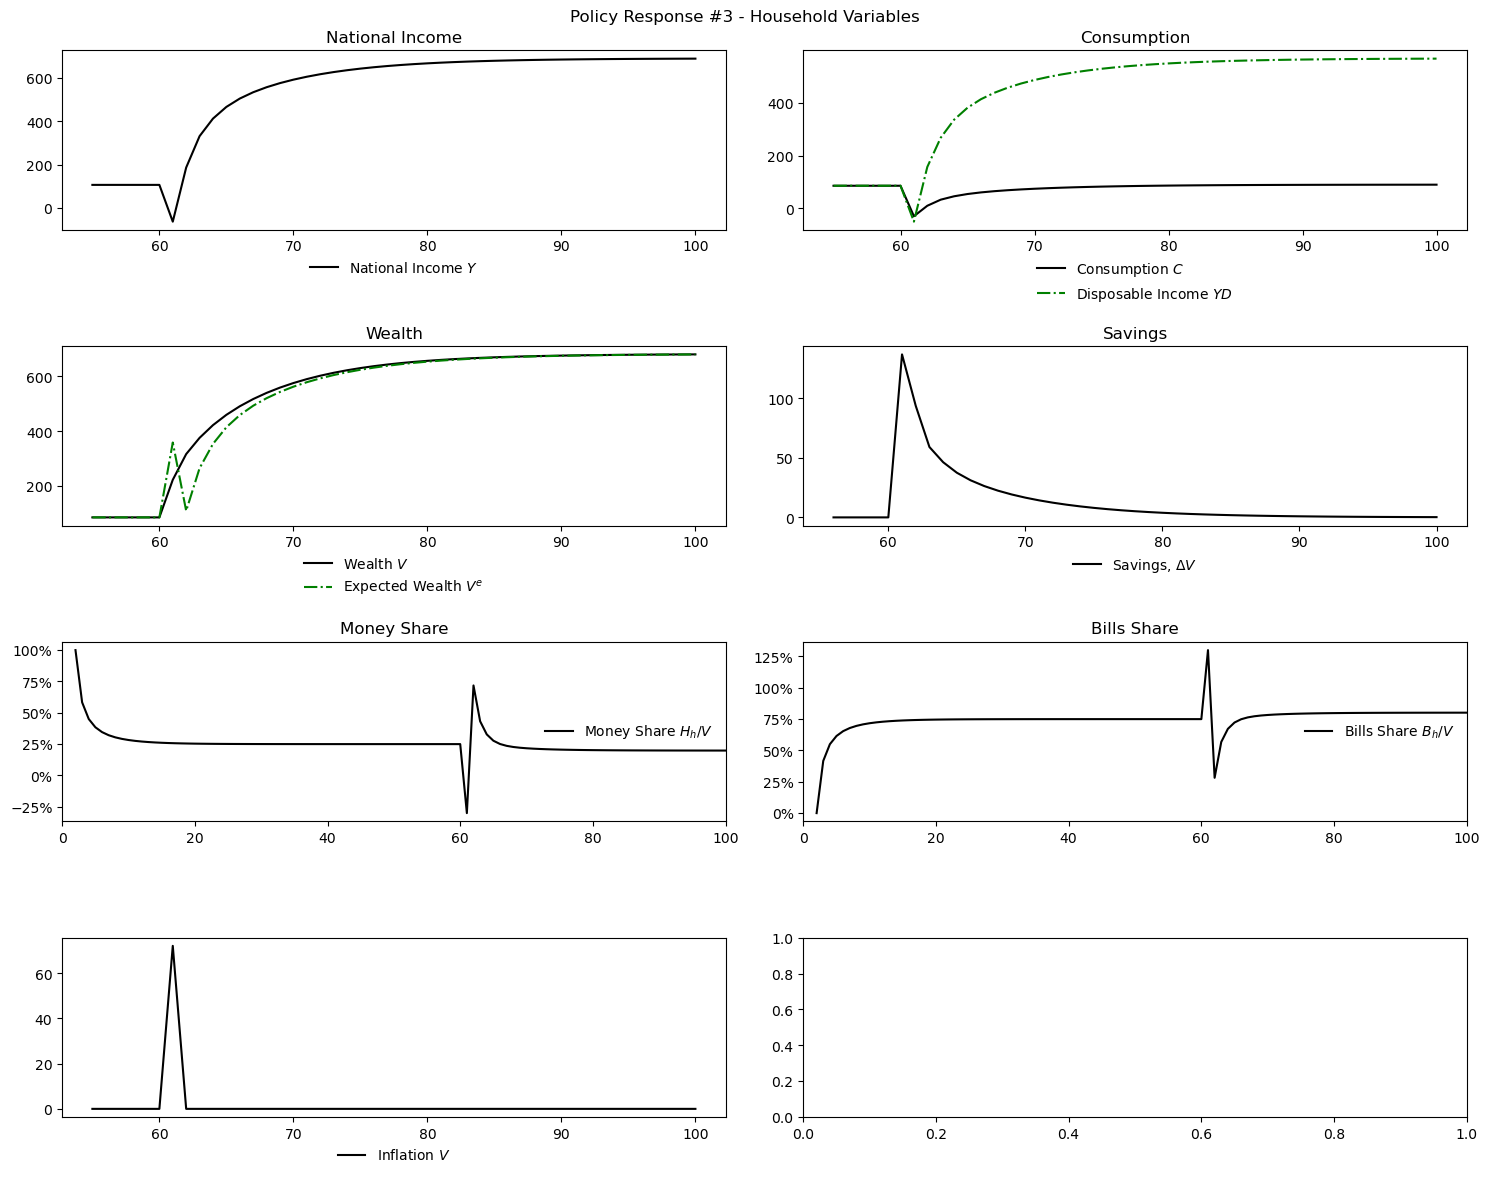

In [14]:
dfo = output3_scenario.loc[55:]

fig, axs = plt.subplots(4, 2, figsize=(15, 12))  

# National Income and Consumption
axs[0,0].plot(dfo.index, dfo['NationalIncome'], color='k', label=r'National Income $Y$')
axs[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,0].set_title('National Income')
axs[0,1].plot(dfo.index, dfo['RealConsumptionHousehold'], color='k', label=r'Consumption $C$')
axs[0,1].plot(dfo.index, dfo['DisposableIncome'], color='g', linestyle='-.', label=r'Disposable Income $YD$')
axs[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[0,1].set_title('Consumption')

# Wealth and Savings
axs[1,0].plot(dfo.index, dfo['Wealth'], color='k', label=r'Wealth $V$')
axs[1,0].plot(dfo.index, dfo['ExpectedWealth'], color='g', linestyle='-.', label=r'Expected Wealth $V^e$')
axs[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,0].set_title('Wealth')
axs[1,1].plot(dfo.index, dfo['Wealth'].diff(), color='k', label=r'Savings, $\Delta V$')
axs[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)
axs[1,1].set_title('Savings')

# Money Share and Bills Share
axs[2,0].plot(output3_scenario.index, output3_scenario['HouseholdMoneyStock'] / output3_scenario['Wealth'], color='k', linestyle='-', label='Money Share $H_h/V$')
axs[2,0].legend(loc='center right', frameon=False)
axs[2,0].set_xlim(0,100)
axs[2,0].set_title('Money Share')
axs[2,0].yaxis.set_major_formatter(PercentFormatter(1))

# Right panel - Bills share
axs[2,1].plot(output3_scenario.index, output3_scenario['HouseholdBillStock'] / output3_scenario['Wealth'], color='k', linestyle='-', label='Bills Share $B_h/V$')
axs[2,1].legend(loc='center right', frameon=False)
axs[2,1].set_xlim(0,100)
axs[2,1].set_title('Bills Share')
axs[2,1].yaxis.set_major_formatter(PercentFormatter(1))

#Inflation rate (growth of CPI)
axs[3,0].plot(dfo.index, dfo['ConsumerPriceInflation'], color='k', label=r'Inflation $V$')
axs[3,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False)

fig.suptitle('Policy Response #3 - Household Variables')
plt.tight_layout()
plt.show()

In [15]:
###Production effects

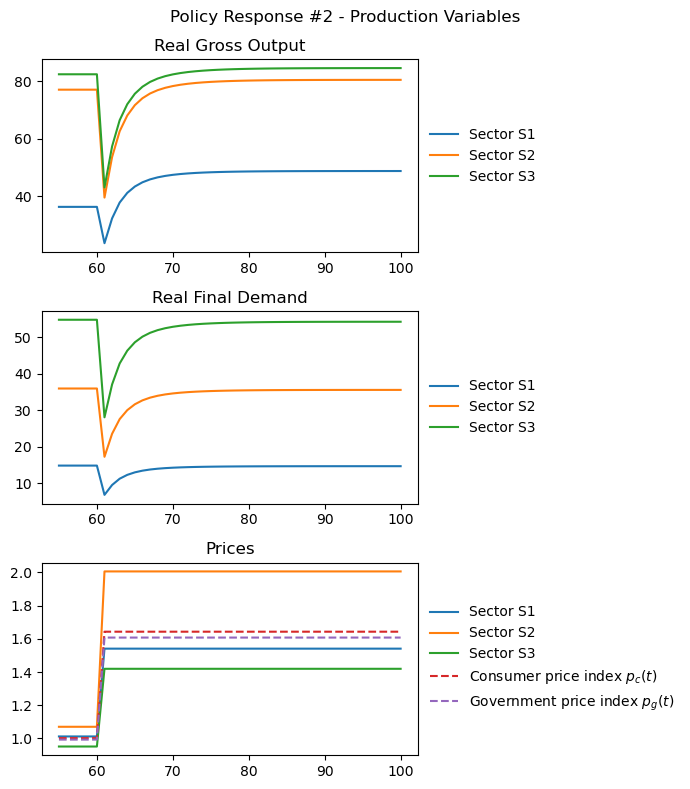

In [16]:
dfo = output2_scenario.loc[55:]

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(7, 8))

# National Income and Consumption
for s in dfo["RealGrossOutput"].columns:
    axs[0].plot(dfo.index, dfo['RealGrossOutput'][s], label=f"Sector {s}")
axs[0].set_title('Real Gross Output')

for s in dfo["RealFinalDemand"].columns:
    axs[1].plot(dfo.index, dfo['RealFinalDemand'][s], label=f"Sector {s}")
axs[1].set_title('Real Final Demand')

for s in dfo["Prices"].columns:
    axs[2].plot(dfo.index, dfo['Prices'][s], label=f"Sector {s}")
axs[2].plot(dfo.index, dfo["ConsumerPriceIndex"], linestyle="--", label=f"Consumer price index $p_c(t)$")
axs[2].plot(dfo.index, dfo["GovernmentPriceIndex"], linestyle="--", label=f"Government price index $p_g(t)$")
axs[2].set_title('Prices')

for ax in axs:
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)


fig.suptitle('Policy Response #2 - Production Variables')
plt.tight_layout()
plt.show()


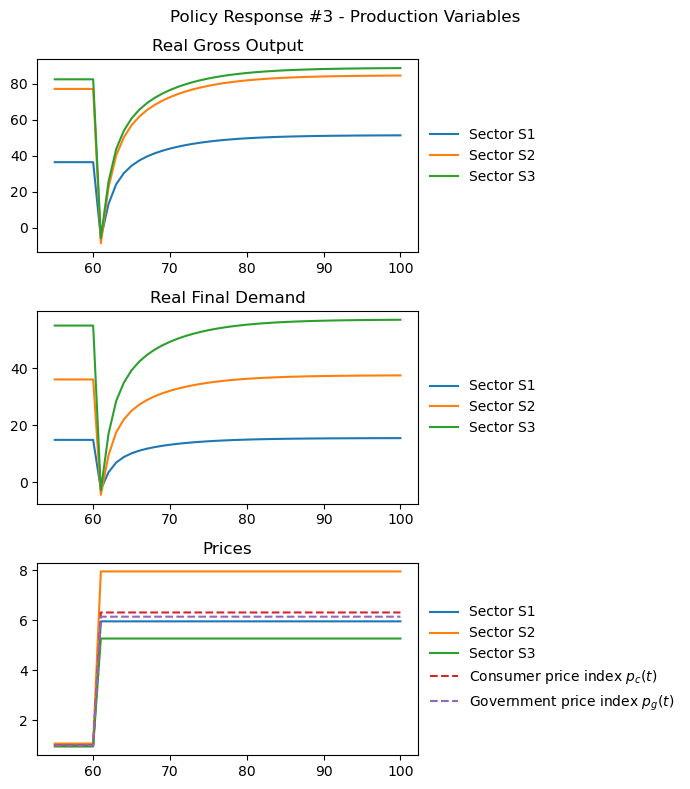

In [17]:
dfo = output3_scenario.loc[55:]

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(7, 8))

# National Income and Consumption
for s in dfo["RealGrossOutput"].columns:
    axs[0].plot(dfo.index, dfo['RealGrossOutput'][s], label=f"Sector {s}")
axs[0].set_title('Real Gross Output')

for s in dfo["RealFinalDemand"].columns:
    axs[1].plot(dfo.index, dfo['RealFinalDemand'][s], label=f"Sector {s}")
axs[1].set_title('Real Final Demand')

for s in dfo["Prices"].columns:
    axs[2].plot(dfo.index, dfo['Prices'][s], label=f"Sector {s}")
axs[2].plot(dfo.index, dfo["ConsumerPriceIndex"], linestyle="--", label=f"Consumer price index $p_c(t)$")
axs[2].plot(dfo.index, dfo["GovernmentPriceIndex"], linestyle="--", label=f"Government price index $p_g(t)$")
axs[2].set_title('Prices')

for ax in axs:
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)


fig.suptitle('Policy Response #3 - Production Variables')
plt.tight_layout()
plt.show()


In [18]:
### end